In [34]:
#step:1- import required libraries
import requests
from bs4 import BeautifulSoup as bs
import html

remember always use some product instead of brand eg. iphone 12 is suitable as it is a product but iphone is a brand so results may be misleading

In [35]:
#step1 : search 
product = "xiaomi 11i"
url = f"https://www.flipkart.com/search?q={product}&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_na&as-pos=1&as-type=RECENT&suggestionId=iphone+13%7CMobiles&requestId=e1f19ba2-fcdd-44e1-bacb-b518627675c6&as-searchtext=i"
r = requests.get(url)
html_content = r.content
soup = bs(html_content,"html.parser")

In [36]:
#lets try to traverse using the a tag
target =  soup.find("a",class_="_1fQZEK" )# we will use only find as we have to get the first anchor with the class = "_1fQZEK"

In [37]:
#extracting the link out of the "a" tag
link = target.get("href")
link

'/xiaomi-11i-hypercharge-5g-pacific-pearl-128-gb/p/itm495eaae251d5b?pid=MOBG9QWVHHSZS9HY&lid=LSTMOBG9QWVHHSZS9HYNDYZZG&marketplace=FLIPKART&q=xiaomi+11i&store=tyy%2F4io&srno=s_1_1&otracker=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_1_na_na_na&fm=organic&iid=ce45aaa0-23da-4017-842f-a572b01b3a1f.MOBG9QWVHHSZS9HY.SEARCH&ppt=None&ppn=None&ssid=9fbsjgtk8w0000001663354347819&qH=d20d5ccdb9f59301'

In [38]:
#step2: go to the product page and extract url for  primary page 
url = f"https://www.flipkart.com{link}"
r = requests.get(url)
html_content = r.content
soup = bs(html_content,"html.parser")
#url link for primary page
ap = soup.find("div",class_="col JOpGWq")
review  = ap.a['href']

In [39]:
review

'/xiaomi-11i-hypercharge-5g-pacific-pearl-128-gb/product-reviews/itm495eaae251d5b?pid=MOBG9QWVHHSZS9HY&lid=LSTMOBG9QWVHHSZS9HYNDYZZG&aid=dc0f2b2d-7619-44cc-b5fc-2fe3e4d453a7&mid=FLIPKART&fid=c5c782f4-a858-415e-afa3-1a427f2c6bd2.MOBG9QWVHHSZS9HY&an=Camera&cat=Mobile&vert=Handset'

In [41]:
#step 3: go to primary page, parse it and extract the url for final page.
url = f"https://www.flipkart.com{review}"
r = requests.get(url)
html_content = r.content
soup = bs(html_content,"html.parser")
#url link for final page
review_link = soup.find("div",class_="_33iqLu").a['href']

In [42]:
review_link

'/xiaomi-11i-hypercharge-5g-pacific-pearl-128-gb/product-reviews/itm495eaae251d5b?pid=MOBG9QWVHHSZS9HY&lid=LSTMOBG9QWVHHSZS9HYNDYZZG&sortOrder=MOST_HELPFUL&certifiedBuyer=false&aid=overall'

In [43]:
#step4 : enter to the final page to get max_page
url = f"https://www.flipkart.com{review_link}"
r = requests.get(url)
html_content = r.content
soup = bs(html_content,"html.parser")

In [59]:
#this extractor function will help to extract all the comments
def extract(review_link, atrr,class1):
    
    #step4 : enter to the final page to get max_page
    
    url = f"https://www.flipkart.com{review_link}"
    r = requests.get(url)
    html_content = r.content
    soup = bs(html_content,"html.parser")
    max_page = int((soup.find("div",class_="_2MImiq _1Qnn1K").span.get_text()).replace(",","")[10:])
    
    
    
    #data extraction begins here
    data = []
    p = 1
    while p <= max_page:
        page = review_link+f"&page={p}"
        url = f"https://www.flipkart.com{page}"
        r = requests.get(url)
        html_content = r.content
        bs_object = bs(html_content,"html.parser")
        stars = bs_object.find_all(atrr,class_=class1)
        p += 1
        for i in stars:
            data.append(i.get_text().replace("READ MORE",""))
            #print(i.get_text().replace("READ MORE",""))
    return(data)

    

In [60]:
#extract all reviews
#rating = extract("div","_3LWZlK _1BLPMq")
comments = extract(review_link ,"div","t-ZTKy")

In [62]:
#extract all ratings
#rating = extract("div","_3LWZlK _1BLPMq")
comments

['Phone looks great in hand.Build quality is good and it looks premium.Display is good and it works smoothly at 120hz settingSound quality is better from previous Xiaomi phones as it has stereo speaker on too and bottom.Charging is super quick. It charged my phone from 2% to 100% in approx 17 minutes.Con- Xiaomi really need to work on its camera especially on front camera.The picture still looks like the one we get on phones in 10000 range.',
 "Xiaomi 11i Hypercharge Camera not work properly camera quality is very poor camera not focus properly in camera take a picture is blurry. she does not return my order please don't order this mobile camera is not work properly",
 "Really nice product from Xiaomi.I loved charging speed with 120w charger. There is no heating issues at all. Display also very good and speakers are in top and bottom of the phone balanced the sound system. The main draw back was camera I'm not satisfied with camera. 108 MP is not good as much as 32 mp .",
 'Overall not

In [63]:
import pandas as pd

In [64]:
data = pd.DataFrame()
data["comment"] = comments
#df.to_csv(f"{product}_review.csv")

In [50]:
#data = pd.read_csv("iphone 12_review.csv")

In [65]:
data

,comment
0,Phone looks great in hand.Build quality is goo...
1,Xiaomi 11i Hypercharge Camera not work properl...
2,Really nice product from Xiaomi.I loved chargi...
3,Overall not good phone . Charging is fast but ...
4,"Excellent product, Thanku Xiaomi. Battery-5/5...."
...,...
424,Loved it Charging spec. 15mins full 100% charge
425,Amazing mobile
426,Loved the product
427,All rounder phoneSpeaker is goodCamera is exce...


In [66]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

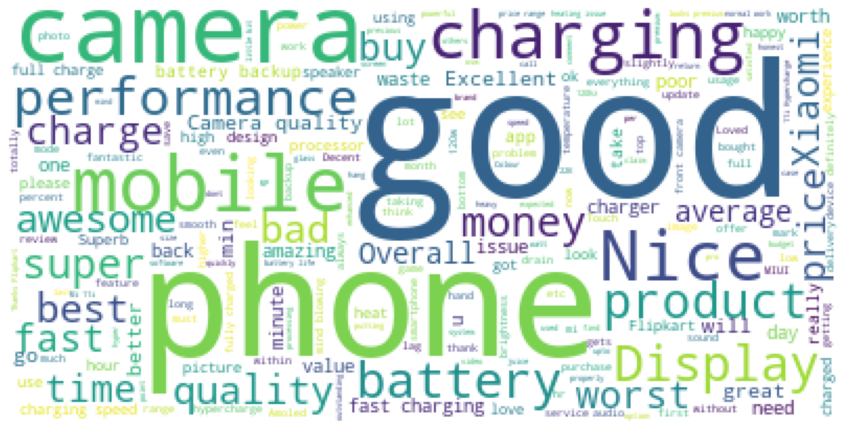

In [67]:
text = " ".join(str(i) for i in data.comment)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='antialiased')
plt.axis("off")
plt.show()

IN LAYMAN'S TERM FOR NOW WE CAN CONCLUDE FEW THINGS LIKE :-

1.PEOPLE ARE TALKING A LOT ABOUT $CAMERA$ , $CHARGING$ , $PERFORMANCE$ , $DISPLAY$ , $BATTERY  BACKUP$ AND MANY MORE THINGS.

2.THEY SEE IT AS $VALUE FOR MONEY$.

3.OVER ALL MOST OF THEM ARE HAPPY WITH QUALITY.

BUT IF WE WANT TO ANALYZE THE WHOLE DATA DEEPLY THEN WE CAN USE SOME OF THE NLP TECHNIQUES TO GET MORE INFO ABOUT THE REVIEWS.